In [1]:
# Start with importing the required libraries
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os

In [2]:
# Define the agent class
class agent:
    pass

In [3]:
# Create the function to initialise the agents
def initialization():
    global agents,data,images,m,n
    agents=[]
    images=[]
    gini=[]
    for i in range(n):              # Loop to create 'n' agents
        ag=agent()
        ag.money = m      # start with 1 coin each
        ag.id = i
        agents.append(ag)

In [4]:
# Define the function to plot the observations at time t and store it
def observe():
    global agents,images
    pl.cla()
    money = [ag.money for ag in agents]
    ag_id = [ag.id for ag in agents]
    plt.bar(ag_id, money, color='g')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Agent ID')
    plt.ylabel('Coin_count')
    plt.title('R='+'_Time='+str(int(t)),fontsize=15)
    plt.savefig('r='+str(int(t))+'.png')
    images.append(imageio.imread('r='+str(int(t))+'.png'))
        

In [5]:
# Define the function to randomly select an agent, check if it's satisfied and move it if it's not
def update():
    global agents, data
    if agents == [ ]:
        return
    ag = agents[pl.randint(len(agents))] # randomly choose an agent
    neighbours = [nb for nb in agents if nb.id != ag.id]
    nb_e = neighbours[pl.randint(len(neighbours))]
    nb_e.money = nb_e.money + 1




In [6]:
def update_one_unit_time( ):
    global agents
    tt = 0.0
    while tt < 1.0:
        tt += 1.0 / len(agents)
        update( )


In [7]:
def gini():
    global agents
    money = [ag.money for ag in agents]
    mad = np.abs(np.subtract.outer(money, money)).mean()
    # Relative mean absolute difference
    rmad = mad/np.mean(money)
    # Gini coefficient
    g = 0.5 * rmad
    return g

In [8]:
def __main__(n_agents,n_money):
    n = n_agents
    m = n_money           


    gini_coeff={}
    t=0
    initialization( )
    observe()
    for t in range(1,101):
        update_one_unit_time( )
        gini_coeff[t] = gini()
        if t in [0,1,2,3,10,100]:
            observe()

        
    fig, axs = plt.subplots(1,1, figsize=(5,5))
    axs.set_ylabel("Gini_coefficient")
    axs.set_xlabel('Model Time Step')
    axs.set_title('Evolution of Gini coefficient over time')
    axs.plot([x for x in gini_coeff.keys()],\
             [y for y in gini_coeff.values()], color="#299C21", label='Gini Coefficient')

    handles, labels = axs.get_legend_handles_labels()
    legend_properties = {'weight':'bold'}
    fig.legend(handles, labels, loc='center',fancybox=True, framealpha=0.1,prop=legend_properties)
    plt.tight_layout(True);

    

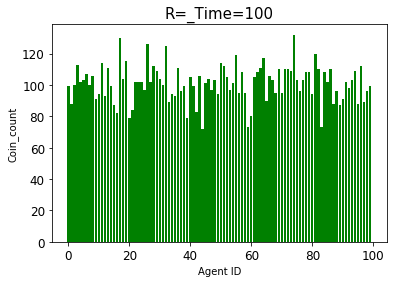

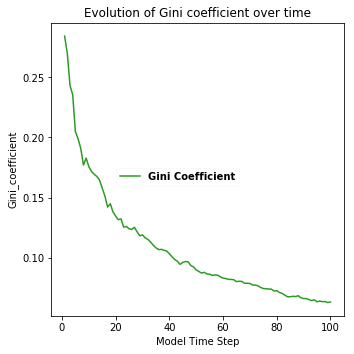

In [9]:
n=100
m=1
t=100
__main__(100,1)

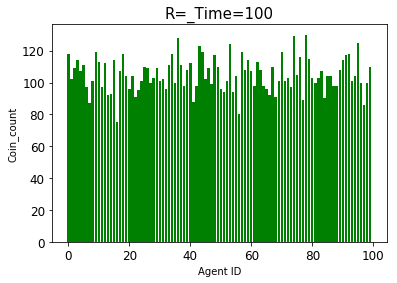

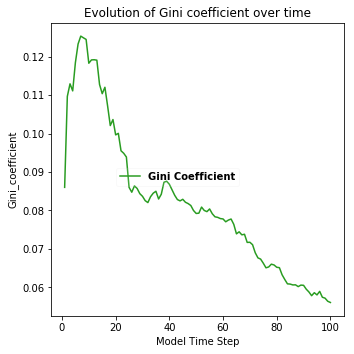

In [10]:
n=100
m=5
__main__(100,5)

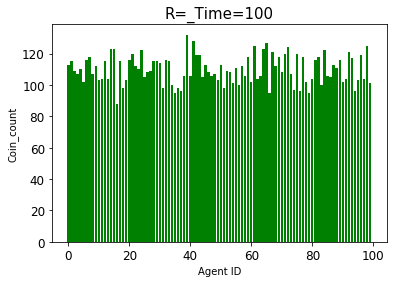

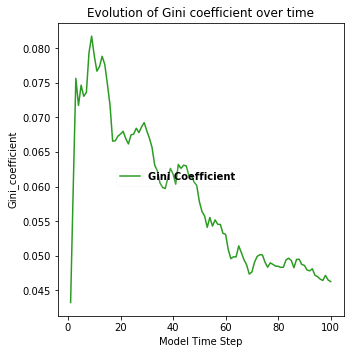

In [11]:
n=100
m=10

__main__(100,10)


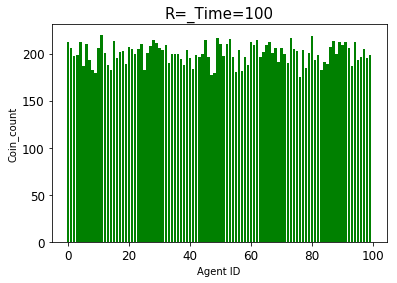

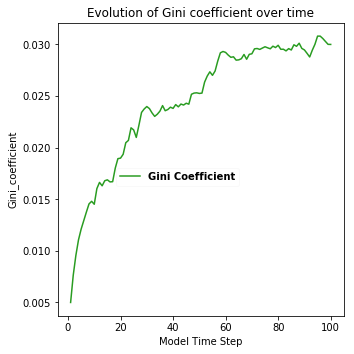

In [12]:
n=100
m=100

__main__(100,10)